<h1>데이터 로딩과 저장(DataFrame)</h1>

<h2><font color="orange">파일 읽기 쓰기</font></h2>

<h4><font color="green">데이터 저장하기</font></h4>

<h4>to_csv()함수</h4>

In [1]:
import random
import pandas as pd

In [2]:
result01 = []
columns01 = ('번호', '이름', '나이')
myencoding = 'CP949'

In [3]:
for idx in range(1, 3):
    sublist = []
    sublist.append(100*idx)
    sublist.append('김철수'+ str(idx))
    sublist.append(random.randint(1, 10))
    result01.append(sublist)

In [4]:
result01

[[100, '김철수1', 10], [200, '김철수2', 4]]

In [5]:
sublist = []
sublist.append('김철수')
sublist.append(20)
sublist.append('용산')
sublist.append(sublist)

In [6]:
sublist = []
sublist.append('박영희')
sublist.append(20)
sublist.append('용산')
sublist.append(sublist)

In [7]:
myframe01 = pd.DataFrame(result01, columns=columns01)
myframe01

,번호,이름,나이
0,100,김철수1,10
1,200,김철수2,4


In [8]:
filename = './../data/rsult01.csv'
myframe01.to_csv(filename, encoding=myencoding, mode='w', index=True)
print(filename + '파일이 저장되었습니다.')

./../data/rsult01.csv파일이 저장되었습니다.


<h4><font color="green">데이터 저장하기</font></h4>

<h4>to_csv()함수</h4>

In [9]:
myframe01 = pd.read_csv(filename, index_col=0, encoding=myencoding)
print(myframe01)

    번호    이름  나이
0  100  김철수1  10
1  200  김철수2   4


In [10]:
print(type(myframe01))

<class 'pandas.core.frame.DataFrame'>


<h2>DataFrame 기초</h2>

<h4><font color="green">기본 속성 살펴보기</font></h4>

In [11]:
payment = pd.read_csv('./../data/payment01.csv', encoding='cp949')
print('데이터 프레임 확인')
display(payment)

데이터 프레임 확인


,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,강감찬,서울,3.0,영업부,남자,1000.0,500
1,김구,서울,NaN,총무부,남자,2000.0,300
2,김유신,부산,7.0,전산부,남자,3000.0,600
3,신사임당,부산,5.0,영업부,여자,NaN,200
4,선덕여왕,서울,6.0,총무부,여자,4000.0,800


In [12]:
payment.index

RangeIndex(start=0, stop=5, step=1)

In [13]:
payment.columns

Index(['사원명', '출장지역', '출장기간', '부서', '성별', '교통비', '식비'], dtype='object')

In [14]:
print(issubclass(pd.RangeIndex, pd.Index))

True


In [15]:
data = payment.values
data

array([['강감찬', '서울', 3.0, '영업부', '남자', 1000.0, 500],
       ['김구', '서울', nan, '총무부', '남자', 2000.0, 300],
       ['김유신', '부산', 7.0, '전산부', '남자', 3000.0, 600],
       ['신사임당', '부산', 5.0, '영업부', '여자', nan, 200],
       ['선덕여왕', '서울', 6.0, '총무부', '여자', 4000.0, 800]], dtype=object)

In [16]:
print(payment.dtypes)

사원명      object
출장지역     object
출장기간    float64
부서       object
성별       object
교통비     float64
식비        int64
dtype: object


In [17]:
business = payment['출장지역']
print('출장 지역 유형 데이터 타입 : ' + str(business.dtypes))

출장 지역 유형 데이터 타입 : object


In [18]:
print('출장 지역 빈도수 확인')
print(business.value_counts())

출장 지역 빈도수 확인
서울    3
부산    2
Name: 출장지역, dtype: int64


<h3>Series 세부적으로 살펴 보기</h3>

<h4><font color="orange">출장비 내열 파일 읽기</font></h4>

<h4>인덱싱 연산자를 사용한 시리즈 추출</h4>

In [19]:
paytravel01 = payment['교통비']
print(type(paytravel01))
print(paytravel01)
paytravel01.to_frame()

<class 'pandas.core.series.Series'>
0    1000.0
1    2000.0
2    3000.0
3       NaN
4    4000.0
Name: 교통비, dtype: float64


,교통비
0,1000.0
1,2000.0
2,3000.0
3,NaN
4,4000.0


<h4>점(dot) 기호를 사용한 시리즈 추출</h4>

In [20]:
paytravel02 = payment.교통비
paytravel02.to_frame()

,교통비
0,1000.0
1,2000.0
2,3000.0
3,NaN
4,4000.0


<h4>Series와 연관된 메소드 사용하기</h4>

<h4><font color="green">메소드 개수 파악하기</font></h4>

In [21]:
series_attr = set(dir(pd.Series))
print('len(series_attr) :', str(len(series_attr)))

len(series_attr) : 422


In [22]:
dataframe_attr = set(dir(pd.DataFrame))
print('len(dataframe_attr) :', str(len(dataframe_attr)))

len(dataframe_attr) : 437


In [23]:
print('len(series_attr & dataframe_attr) :', end='')
print(len(series_attr & dataframe_attr))

len(series_attr & dataframe_attr) :367


<h4><font color="pink">메소드 확인하기</font></h4>

In [24]:
sorted_series_attr = sorted([attr for attr in series_attr if not attr.startswith('_')])
sorted_series_attr[0:10]

['T',
 'abs',
 'add',
 'add_prefix',
 'add_suffix',
 'agg',
 'aggregate',
 'align',
 'all',
 'any']

In [25]:
paytravel = payment['교통비']
print(paytravel.head())

0    1000.0
1    2000.0
2    3000.0
3       NaN
4    4000.0
Name: 교통비, dtype: float64


In [26]:
business = payment['출장기간']
print(business.head())

0    3.0
1    NaN
2    7.0
3    5.0
4    6.0
Name: 출장기간, dtype: float64


In [27]:
print('paytravel.size :' + str(paytravel.size))
print('paytravel.shape :' + str(paytravel.shape))
print('len(paytravel) :' + str(len(paytravel)))
print('paytravel.count() :' + str(paytravel.count()))

paytravel.size :5
paytravel.shape :(5,)
len(paytravel) :5
paytravel.count() :4


In [28]:
print('business.quantile() :' +str(business.quantile()))
print('business.min() :' +str(business.min()))
print('business.max() :' +str(business.max()))
print('business.mean() :' +str(business.mean()))
print('business.median() :' +str(business.median()))
print('business.std() :' +str(business.std()))
print('business.sum() :' +str(business.sum()))

business.quantile() :5.5
business.min() :3.0
business.max() :7.0
business.mean() :5.25
business.median() :5.5
business.std() :1.707825127659933
business.sum() :21.0


In [29]:
print(paytravel.describe)

<bound method NDFrame.describe of 0    1000.0
1    2000.0
2    3000.0
3       NaN
4    4000.0
Name: 교통비, dtype: float64>


<h4>누락된 데이터 확인</h4>

In [30]:
print('교통비에 누락된 데이터가 있나요? ' +str((paytravel.hasnans)))

교통비에 누락된 데이터가 있나요? True


In [31]:
print('notnull() 메소드 사용하기')
print(paytravel.notnull().head())

notnull() 메소드 사용하기
0     True
1     True
2     True
3    False
4     True
Name: 교통비, dtype: bool


<h4>빈도수 파악하기</h4>

In [32]:
print(paytravel.value_counts())

1000.0    1
2000.0    1
3000.0    1
4000.0    1
Name: 교통비, dtype: int64


In [33]:
print(paytravel.value_counts(normalize=True))

1000.0    0.25
2000.0    0.25
3000.0    0.25
4000.0    0.25
Name: 교통비, dtype: float64


In [34]:
display(business.to_frame())

,출장기간
0,3.0
1,NaN
2,7.0
3,5.0
4,6.0


In [35]:
display(business.isnull().to_frame())

,출장기간
0,False
1,True
2,False
3,False
4,False


In [36]:
print('누락된 데이터 개수 :' + str(business.isnull().sum()))

누락된 데이터 개수 :1


In [37]:
print(business.fillna(0).astype(int))

0    3
1    0
2    7
3    5
4    6
Name: 출장기간, dtype: int32


In [38]:
print('누락된 데이터의 비율 : ' +str(business.isnull().mean()))

누락된 데이터의 비율 : 0.2


<h2>재색인 기능의 사용</h2>

<h4><font color="green">색인 재설정과 이름 변경</font></h4>

<h4>색인 재설정하기</h4>

In [39]:
payment = pd.read_csv('./../data/payment01.csv', encoding='cp949')
display(payment)

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,강감찬,서울,3.0,영업부,남자,1000.0,500
1,김구,서울,NaN,총무부,남자,2000.0,300
2,김유신,부산,7.0,전산부,남자,3000.0,600
3,신사임당,부산,5.0,영업부,여자,NaN,200
4,선덕여왕,서울,6.0,총무부,여자,4000.0,800


In [40]:
payment = payment.set_index('사원명')
display(payment)

,출장지역,출장기간,부서,성별,교통비,식비
사원명,,,,,,
강감찬,서울,3.0,영업부,남자,1000.0,500
김구,서울,NaN,총무부,남자,2000.0,300
김유신,부산,7.0,전산부,남자,3000.0,600
신사임당,부산,5.0,영업부,여자,NaN,200
선덕여왕,서울,6.0,총무부,여자,4000.0,800


In [41]:
renamed_row = {'김구':'유관순', '선덕여왕':'진덕여왕'}
renamed_col = {'출장지역':'다녀온 곳', '식비':'밥값'}

payment = payment.rename(index=renamed_row, columns=renamed_col)
display(payment)

,다녀온 곳,출장기간,부서,성별,교통비,밥값
사원명,,,,,,
강감찬,서울,3.0,영업부,남자,1000.0,500
유관순,서울,NaN,총무부,남자,2000.0,300
김유신,부산,7.0,전산부,남자,3000.0,600
신사임당,부산,5.0,영업부,여자,NaN,200
진덕여왕,서울,6.0,총무부,여자,4000.0,800


In [42]:
display(payment)

,다녀온 곳,출장기간,부서,성별,교통비,밥값
사원명,,,,,,
강감찬,서울,3.0,영업부,남자,1000.0,500
유관순,서울,NaN,총무부,남자,2000.0,300
김유신,부산,7.0,전산부,남자,3000.0,600
신사임당,부산,5.0,영업부,여자,NaN,200
진덕여왕,서울,6.0,총무부,여자,4000.0,800


<h4>색인의 생성과 삭제</h4>

In [43]:
payment = pd.read_csv('./../data/payment01.csv', encoding='cp949')
display(payment)

,사원명,출장지역,출장기간,부서,성별,교통비,식비
0,강감찬,서울,3.0,영업부,남자,1000.0,500
1,김구,서울,NaN,총무부,남자,2000.0,300
2,김유신,부산,7.0,전산부,남자,3000.0,600
3,신사임당,부산,5.0,영업부,여자,NaN,200
4,선덕여왕,서울,6.0,총무부,여자,4000.0,800


In [44]:
payment['차량 지원'] = '지원'
display(payment)

,사원명,출장지역,출장기간,부서,성별,교통비,식비,차량 지원
0,강감찬,서울,3.0,영업부,남자,1000.0,500,지원
1,김구,서울,NaN,총무부,남자,2000.0,300,지원
2,김유신,부산,7.0,전산부,남자,3000.0,600,지원
3,신사임당,부산,5.0,영업부,여자,NaN,200,지원
4,선덕여왕,서울,6.0,총무부,여자,4000.0,800,지원


In [45]:
payment['최종 식비'] = (payment['식비'] + 100)
display(payment)

,사원명,출장지역,출장기간,부서,성별,교통비,식비,차량 지원,최종 식비
0,강감찬,서울,3.0,영업부,남자,1000.0,500,지원,600
1,김구,서울,NaN,총무부,남자,2000.0,300,지원,400
2,김유신,부산,7.0,전산부,남자,3000.0,600,지원,700
3,신사임당,부산,5.0,영업부,여자,NaN,200,지원,300
4,선덕여왕,서울,6.0,총무부,여자,4000.0,800,지원,900


In [46]:
payment = payment.drop(3, axis='index')
display(payment)

,사원명,출장지역,출장기간,부서,성별,교통비,식비,차량 지원,최종 식비
0,강감찬,서울,3.0,영업부,남자,1000.0,500,지원,600
1,김구,서울,NaN,총무부,남자,2000.0,300,지원,400
2,김유신,부산,7.0,전산부,남자,3000.0,600,지원,700
4,선덕여왕,서울,6.0,총무부,여자,4000.0,800,지원,900


In [47]:
payment = payment.drop('출장기간', axis='columns')
display(payment)

,사원명,출장지역,부서,성별,교통비,식비,차량 지원,최종 식비
0,강감찬,서울,영업부,남자,1000.0,500,지원,600
1,김구,서울,총무부,남자,2000.0,300,지원,400
2,김유신,부산,전산부,남자,3000.0,600,지원,700
4,선덕여왕,서울,총무부,여자,4000.0,800,지원,900


In [48]:
payment = payment.drop(['차량 지원', '부서'], axis='columns')
display(payment)

,사원명,출장지역,성별,교통비,식비,최종 식비
0,강감찬,서울,남자,1000.0,500,600
1,김구,서울,남자,2000.0,300,400
2,김유신,부산,남자,3000.0,600,700
4,선덕여왕,서울,여자,4000.0,800,900


<h2>파이 그래프 그리기</h2>

<h4><font color='orange'>데이터 가공</font></h4>

In [49]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [50]:
chartdata = payment.set_index(['사원명'])
chartdata

,출장지역,성별,교통비,식비,최종 식비
사원명,,,,,
강감찬,서울,남자,1000.0,500,600
김구,서울,남자,2000.0,300,400
김유신,부산,남자,3000.0,600,700
선덕여왕,서울,여자,4000.0,800,900


In [51]:
payment

,사원명,출장지역,성별,교통비,식비,최종 식비
0,강감찬,서울,남자,1000.0,500,600
1,김구,서울,남자,2000.0,300,400
2,김유신,부산,남자,3000.0,600,700
4,선덕여왕,서울,여자,4000.0,800,900


<h4><font color='orange'>파이 그래프 식비</font></h4>

In [52]:
mycolors = ['blue', '#6AFF00', 'yellow', '#FF003C']
chartdata01=chartdata['식비']
chartdata01.to_frame()

,식비
사원명,
강감찬,500
김구,300
김유신,600
선덕여왕,800


Text(0.5, 1.0, '식비지급율')

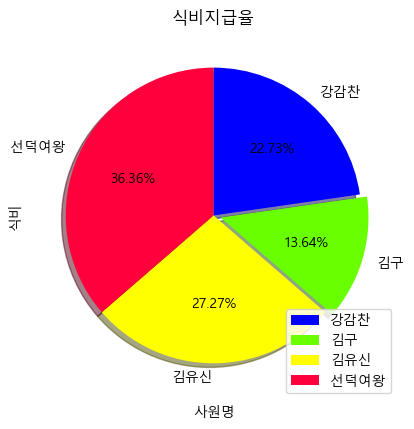

In [53]:
mylabel = chartdata01.index
chartdata01.plot(kind='pie', labels=mylabel, shadow=True, explode=(0,0.05,0,0),
                colors=mycolors, autopct='%1.2f%%', 
                startangle=90, counterclock=False)

plt.grid(True)
plt.legend(loc=4)
plt.xlabel(chartdata01.index.name)
plt.title(chartdata01.name + '지급율')

In [54]:
chartdata02 = chartdata['최종 식비']
chartdata02.to_frame()

,최종 식비
사원명,
강감찬,600
김구,400
김유신,700
선덕여왕,900


Text(0.5, 1.0, '최종 식비지급율')

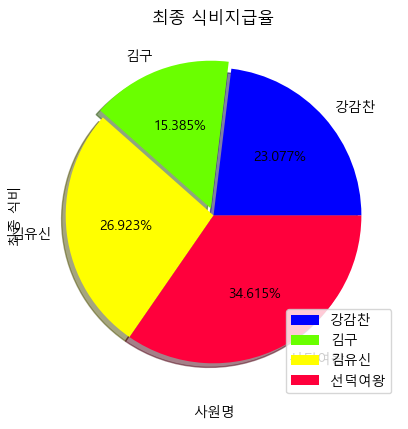

In [55]:
mylabel = chartdata02.index
chartdata02.plot(kind='pie', labels=mylabel, shadow=True, explode=(0,0.05,0,0),
                colors=mycolors, autopct='%1.3f%%', 
                startangle=0, counterclock=True)

plt.grid(True)
plt.legend(loc=4)
plt.xlabel(chartdata02.index.name)
plt.title(chartdata02.name + '지급율')

In [56]:
homeware = pd.read_csv('./../data/가전제품.csv', encoding='cp949')
homeware

'분기' 컬럼은 'quarter'으로, '출고량' 컬럼은 'output'으로 이름을 변경해 보세요.
"일생산량"에 대한 총합과 평균과 표준 편차를 확인해 보세요.

다음과 같이 신규 컬럼을 추가해 보세요.
    남은량 = 총생산량 - 출고량
    불량률 = 불량품/일생산량

제품명이 '미니오븐'인 행을 삭제하세요.
'불량품', '출고량' 컬럼을 삭제하세요.

'믹서기'만 추출하여 "일생산량" 컬럼에 대한 Pie 그래프를 그려 보세요.

SyntaxError: invalid syntax (1560224368.py, line 4)

In [57]:
homeware = pd.read_csv('./../data/가전제품.csv', encoding='cp949')
homeware

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량
0,미니오븐,1,85,20,6000,24,50
1,전기밥솥,1,85,25,9000,36,80
2,믹서기,1,90,25,12000,48,80
3,전자레인지,1,85,25,7200,29,50
4,미니냉장고,1,65,25,4800,19,65
5,선풍기,1,70,25,10800,43,55
6,미니오븐,2,85,20,4960,26,55
7,전기밥솥,2,70,20,11160,39,65
8,믹서기,2,85,25,12800,39,80
9,전자레인지,2,90,20,7680,22,60


In [58]:
homeware = homeware.set_index('제품명')
homeware

,분기,일생산량,생산일수,총생산량,불량품,출고량
제품명,,,,,,
미니오븐,1,85,20,6000,24,50
전기밥솥,1,85,25,9000,36,80
믹서기,1,90,25,12000,48,80
전자레인지,1,85,25,7200,29,50
미니냉장고,1,65,25,4800,19,65
선풍기,1,70,25,10800,43,55
미니오븐,2,85,20,4960,26,55
전기밥솥,2,70,20,11160,39,65
믹서기,2,85,25,12800,39,80


In [59]:
renamed_col = {'분기':'quarter','출고량':'output'}

homeware = homeware.rename(columns=renamed_col)
display(homeware)


,quarter,일생산량,생산일수,총생산량,불량품,output
제품명,,,,,,
미니오븐,1,85,20,6000,24,50
전기밥솥,1,85,25,9000,36,80
믹서기,1,90,25,12000,48,80
전자레인지,1,85,25,7200,29,50
미니냉장고,1,65,25,4800,19,65
선풍기,1,70,25,10800,43,55
미니오븐,2,85,20,4960,26,55
전기밥솥,2,70,20,11160,39,65
믹서기,2,85,25,12800,39,80


In [60]:
working = homeware['일생산량']
print(working.head())

제품명
미니오븐     85
전기밥솥     85
믹서기      90
전자레인지    85
미니냉장고    65
Name: 일생산량, dtype: int64


In [61]:
print('working.quantile() :' +str(working.quantile()))
print('working.min() :' +str(working.min()))
print('working.max() :' + str(working.max()))
print('working.sum() :' +str(working.sum()))
print('working.median() :' +str(working.median()))
print('working.std() :' +str(working.std()))

working.quantile() :85.0
working.min() :65
working.max() :100
working.sum() :1990
working.median() :85.0
working.std() :9.881544795032399


In [62]:
#     남은량 = 총생산량 - 출고량
#     불량률 = 불량품/일생산량


In [63]:
homeware = pd.read_csv('./../data/가전제품.csv', encoding='cp949')
homeware

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량
0,미니오븐,1,85,20,6000,24,50
1,전기밥솥,1,85,25,9000,36,80
2,믹서기,1,90,25,12000,48,80
3,전자레인지,1,85,25,7200,29,50
4,미니냉장고,1,65,25,4800,19,65
5,선풍기,1,70,25,10800,43,55
6,미니오븐,2,85,20,4960,26,55
7,전기밥솥,2,70,20,11160,39,65
8,믹서기,2,85,25,12800,39,80
9,전자레인지,2,90,20,7680,22,60


In [64]:
homeware['남은량'] = (homeware['총생산량'] - homeware['출고량'])
homeware['불량률'] = (homeware['불량품']/homeware['일생산량'])
display(homeware)

,제품명,분기,일생산량,생산일수,총생산량,불량품,출고량,남은량,불량률
0,미니오븐,1,85,20,6000,24,50,5950,0.282353
1,전기밥솥,1,85,25,9000,36,80,8920,0.423529
2,믹서기,1,90,25,12000,48,80,11920,0.533333
3,전자레인지,1,85,25,7200,29,50,7150,0.341176
4,미니냉장고,1,65,25,4800,19,65,4735,0.292308
5,선풍기,1,70,25,10800,43,55,10745,0.614286
6,미니오븐,2,85,20,4960,26,55,4905,0.305882
7,전기밥솥,2,70,20,11160,39,65,11095,0.557143
8,믹서기,2,85,25,12800,39,80,12720,0.458824
9,전자레인지,2,90,20,7680,22,60,7620,0.244444


In [65]:
homeware = homeware.set_index('제품명')
homeware

,분기,일생산량,생산일수,총생산량,불량품,출고량,남은량,불량률
제품명,,,,,,,,
미니오븐,1,85,20,6000,24,50,5950,0.282353
전기밥솥,1,85,25,9000,36,80,8920,0.423529
믹서기,1,90,25,12000,48,80,11920,0.533333
전자레인지,1,85,25,7200,29,50,7150,0.341176
미니냉장고,1,65,25,4800,19,65,4735,0.292308
선풍기,1,70,25,10800,43,55,10745,0.614286
미니오븐,2,85,20,4960,26,55,4905,0.305882
전기밥솥,2,70,20,11160,39,65,11095,0.557143
믹서기,2,85,25,12800,39,80,12720,0.458824


In [66]:
homeware = homeware.drop(['미니오븐'], axis='index')
display(homeware)

,분기,일생산량,생산일수,총생산량,불량품,출고량,남은량,불량률
제품명,,,,,,,,
전기밥솥,1,85,25,9000,36,80,8920,0.423529
믹서기,1,90,25,12000,48,80,11920,0.533333
전자레인지,1,85,25,7200,29,50,7150,0.341176
미니냉장고,1,65,25,4800,19,65,4735,0.292308
선풍기,1,70,25,10800,43,55,10745,0.614286
전기밥솥,2,70,20,11160,39,65,11095,0.557143
믹서기,2,85,25,12800,39,80,12720,0.458824
전자레인지,2,90,20,7680,22,60,7620,0.244444
미니냉장고,2,90,25,5120,22,60,5060,0.244444


In [67]:
# 제품명이 '미니오븐'인 행을 삭제하세요.
# '불량품', '출고량' 컬럼을 삭제하세요.

# '믹서기'만 추출하여 "일생산량" 컬럼에 대한 Pie 그래프를 그려 보세요.

In [68]:
homeware = homeware.drop(['불량품','출고량'], axis='columns')
display(homeware)

,분기,일생산량,생산일수,총생산량,남은량,불량률
제품명,,,,,,
전기밥솥,1,85,25,9000,8920,0.423529
믹서기,1,90,25,12000,11920,0.533333
전자레인지,1,85,25,7200,7150,0.341176
미니냉장고,1,65,25,4800,4735,0.292308
선풍기,1,70,25,10800,10745,0.614286
전기밥솥,2,70,20,11160,11095,0.557143
믹서기,2,85,25,12800,12720,0.458824
전자레인지,2,90,20,7680,7620,0.244444
미니냉장고,2,90,25,5120,5060,0.244444


In [69]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [70]:
homeware

,분기,일생산량,생산일수,총생산량,남은량,불량률
제품명,,,,,,
전기밥솥,1,85,25,9000,8920,0.423529
믹서기,1,90,25,12000,11920,0.533333
전자레인지,1,85,25,7200,7150,0.341176
미니냉장고,1,65,25,4800,4735,0.292308
선풍기,1,70,25,10800,10745,0.614286
전기밥솥,2,70,20,11160,11095,0.557143
믹서기,2,85,25,12800,12720,0.458824
전자레인지,2,90,20,7680,7620,0.244444
미니냉장고,2,90,25,5120,5060,0.244444


In [71]:
mixer = homeware.loc[homeware['제품명'] == '믹서기', ['분기', '일생산량']]
mixer

KeyError: '제품명'

In [ ]:
quarter = mixer['분기'].to_list() 
quarter = [str(quad) + '사분기' for quad in quarter]
quarter
mixer.index = quarter 
mixer = mixer.drop('quarter', axis='columns')
mixer.name = '믹서기'